<a href="https://colab.research.google.com/github/Thofa90/Project-Predicting-Product-Delivery-Time-for-an-Electronics-Store-E-Commerce/blob/main/Project_Predict_Delivery_Time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: E-commerce. Predicting Product Delivery Time for an Electronics Store**

# **Industry Overview & Business Context**

In today’s fast-paced e-commerce industry, delivery speed is a critical factor in customer satisfaction and business success. Customers expect timely deliveries, and delays can lead to negative reviews, lost trust, and reduced repeat purchases. For an international electronics retailer, ensuring accurate delivery time predictions can optimize logistics, reduce costs, and improve the overall customer experience.
Currently, the company faces challenges in predicting which orders are at risk of late delivery. By leveraging machine learning, they aim to proactively identify such risks, improve logistics planning, and ultimately enhance customer satisfaction.

# **Data Loading & Goal of the Project**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv("/content/drive/My Drive/Datasets/e_commerce.csv")
df.head()

Mounted at /content/drive


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


**The data contains the following information:**

**ID:** ID Number of Customers.
**Warehouse block:** The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
**Mode of shipment:**The Company Ships the products in multiple way such as Ship, Flight and Road.
**Customer care calls:** The number of calls made from enquiry for enquiry of the shipment.
**Customer rating:** The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
**Cost of the product:** Cost of the Product in US Dollars.
**Prior purchases:** The Number of Prior Purchase.
**Product importance:** The company has categorized the product in the various parameter such as low, medium, high.
**Gender:** Male and Female.
**Discount offered:** Discount offered on that specific product.
**Weight in gms:** It is the weight in grams.
**Reached on time:** It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

**Goal of the project**

The goal is to analyze these variables and build a predictive model that determines whether an order will arrive on time or not.

**Key Performance Indicators (KPIs)**

Success in this project will be measured by:

**Prediction Accuracy:** How well the model classifies on-time vs. delayed deliveries.

**Precision & Recall:** Ensuring minimal false negatives (i.e., missed late deliveries).

**Business Impact:** Potential reduction in late deliveries by optimizing logistics based on model insights.

# **Exploratory Data Analysis**

## **1.Basic Information & Summary**

👉 Look for:

	•	Missing values
	•	Categorical vs numerical columns
	•	Column ranges, outliers, invalid data


In [ ]:
# Check basic structure
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())

(10999, 12)
Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms 

The company has collected data on **10,999 transactions** across **12 key variables** related to order fulfillment.

Dtypes are correctly assigned to each columns (**4 categorical columns and 8 numerical columns**) and columns contain **no NAN** values.

**📊 Statistical Summary of Key Variables (n = 10,999 transactions)**

**✅ Target Variable**

	•	Reached.on.Time_Y.N:
	•	0 = Reached on time, 1 = Not reached on time
	•	59.7% of shipments were not on time
	•	Class imbalance exists, consider handling this during modeling

⸻

**📞 Customer_care_calls**

	•	Mean = 4.05 | Range = 2 to 7 calls
	•	Majority made 3–5 calls → may reflect urgency/frustration

**⭐ Customer_rating**

	•	Mean = 2.99 | Range = 1 to 5
	•	Ratings are fairly balanced, median = 3

**💲 Cost_of_the_Product**

	•	Mean = $210 | Range = $96 to $310
	•	No extreme outliers, appears reasonably priced

**📦 Prior_purchases**

	•	Mean = 3.57 | Range = 2 to 10
	•	Most customers had 2 to 4 prior purchases
	•	Indicates moderate returning customer base

**🎁 Discount_offered**

	•	Mean = 13.37%, but ranges widely from 1% to 65%
	•	Very high standard deviation → possibly affects delivery timelines (e.g., heavy discounts = delays?)

**⚖️ Weight_in_gms**

	•	Mean = 3634g | Range = 1001g to 7846g
	•	Wide variation — could impact delivery logistics

## **2.Check for Missing & Duplicates**

In [ ]:
print('check null\n', df.isnull().sum())  # Missing values
print('\n')
print('check duplicate\n',df.duplicated().sum())  # Duplicate rows

check null
 ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


check duplicate
 0


Null values and duplicated values are not present.

## **3.Target Variable Distribution**

👉 Check if the dataset is imbalanced (e.g., 80% on-time, 20% late)

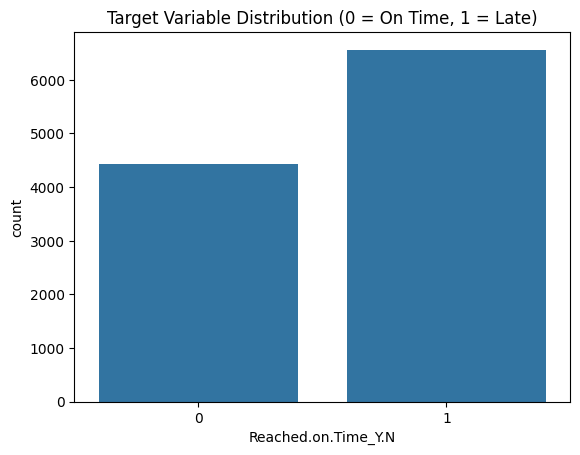

Reached.on.Time_Y.N
1    0.596691
0    0.403309
Name: proportion, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Reached.on.Time_Y.N', data=df)
plt.title("Target Variable Distribution (0 = On Time, 1 = Late)")
plt.show()

print(df['Reached.on.Time_Y.N'].value_counts(normalize=True))

59.66% delivery were late and 40.33% delivery were on time. The reason and proper investigation behind late delivery is our main concern.

## **4.Numerical Features Analysis**

👉 Look for:

	•	Skewness
	•	Outliers
	•	Need for transformation (e.g., log-scaling)

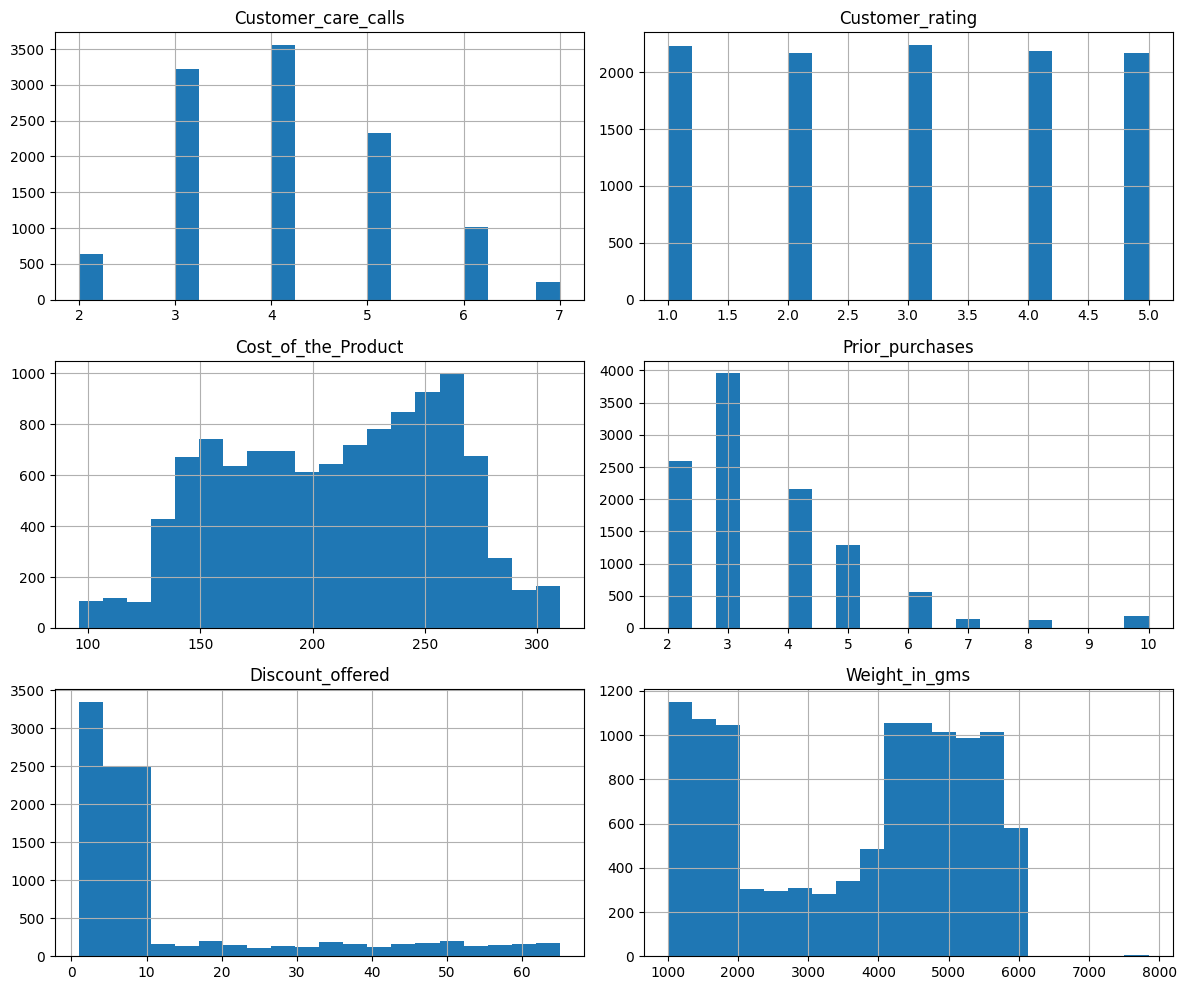

In [ ]:
numerical = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
             'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

df[numerical].hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

•	Most customers made 3 to 4 customer care calls, with very few reaching 7.

• Customer ratings are evenly distributed across all levels from 1 to 5, indicating a balanced perception of service quality.

• From Cost of the product column, most items priced in dollar between 150 & 270, peaking around $260.

• Prior purchases are mostly between 2 and 5, with 3 being the most frequent, indicating a moderately loyal customer base.

•	Discount_offered is highly right-skewed, with the majority of products receiving less than 10% discount.

•	Weight_in_gms shows a bimodal distribution, indicating two distinct product weight categories—one lighter group (1000 – 2000g) and one heavier (~4000–5000g).


  


## **5.Boxplots of Numerical Columns per transaction**

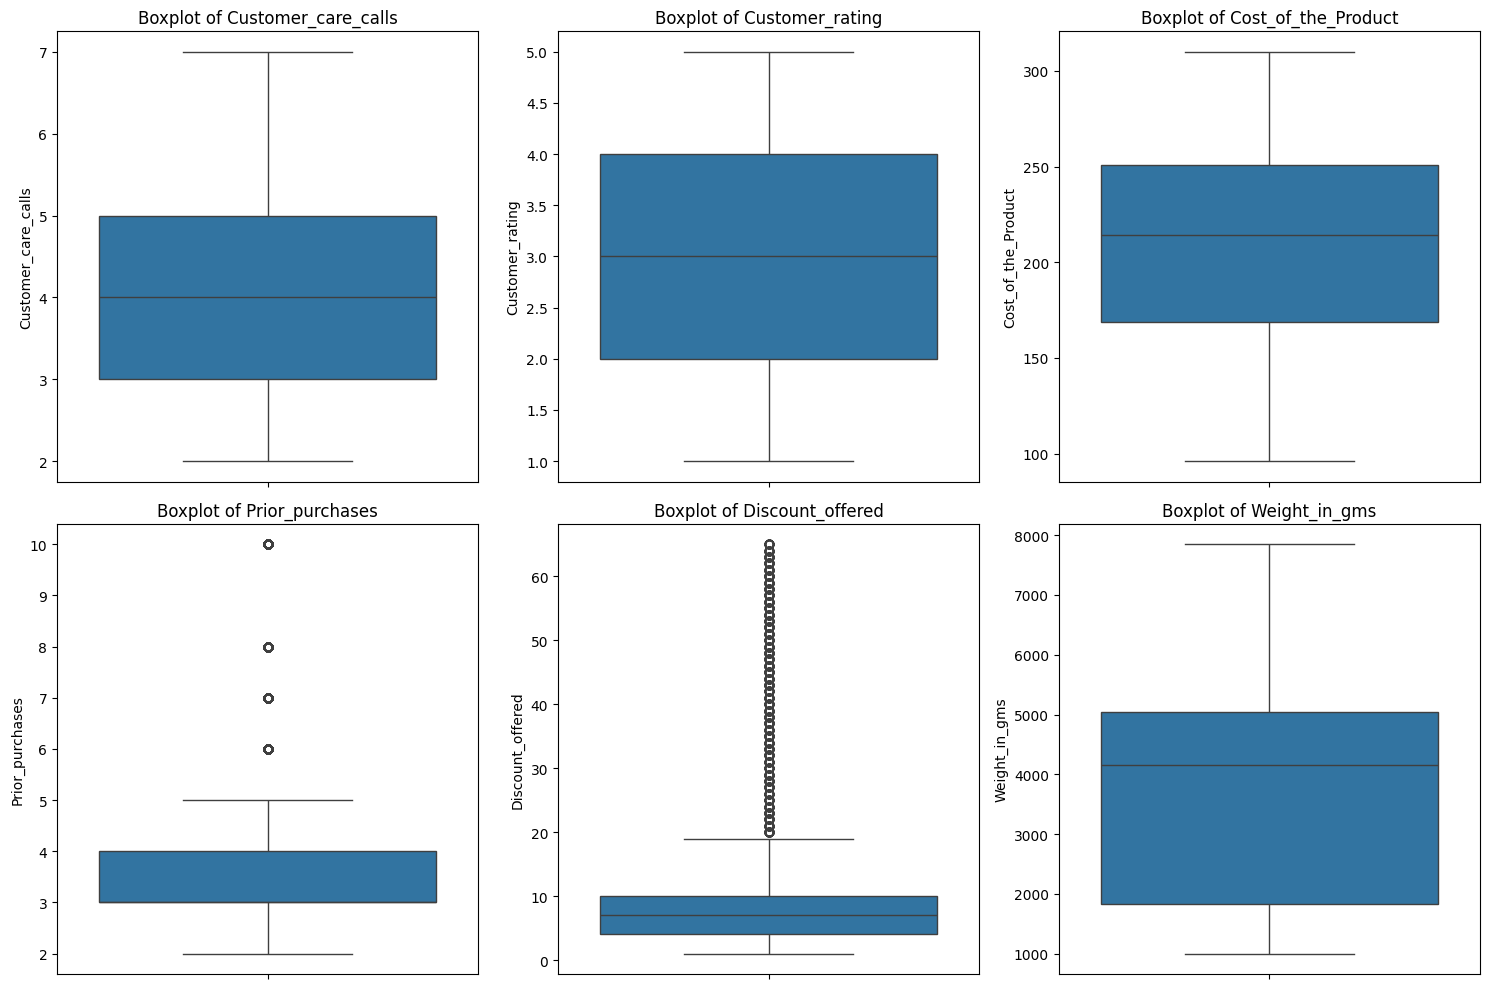

In [ ]:
# prboxplot of all numarical column separately

import matplotlib.pyplot as plt
# Select only the numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove the target variable if it's included
if 'Reached.on.Time_Y.N' in numerical_cols:
    numerical_cols.remove('Reached.on.Time_Y.N')
# Remove ID column if it's included
if 'ID' in numerical_cols:
    numerical_cols.remove('ID')

# Create boxplots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid based on the number of numerical columns
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Here’s a quick explanation for each boxplot based on per-transaction values:

	1.	Customer care calls: Most customers made 3–5 calls, with no outliers.
	2.	Customer rating: Ratings are spread evenly from 1 to 5; median is 3.
	3.	Cost of the product: Prices range mostly between $170–$260, with no strong skew or outliers.
	4.	Prior purchases: Most customers had 2–4 prior purchases; higher values (6–10) are rare outliers.
	5.	Discount offered: Most discounts fall under 20%, but many high-discount outliers (up to 65%) exist.
	6.	Weight in gms: Product weights vary widely from ~1000g to ~7800g; heavier products are more frequent.

## **6.Boxplot vs Target Variable**


👉 This shows how each feature varies with the target — helpful for feature importance later.

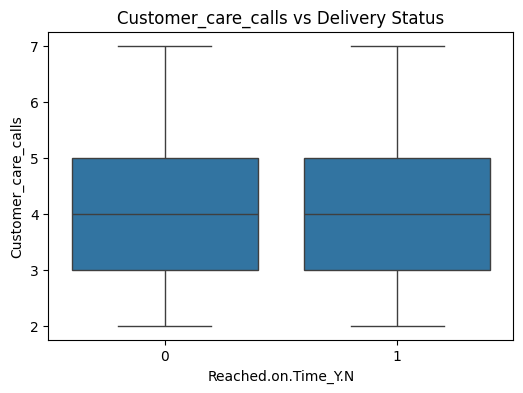

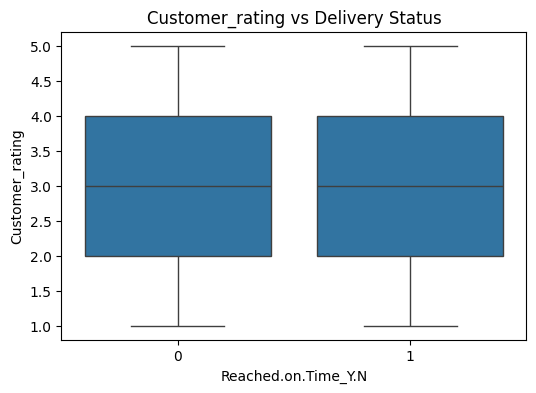

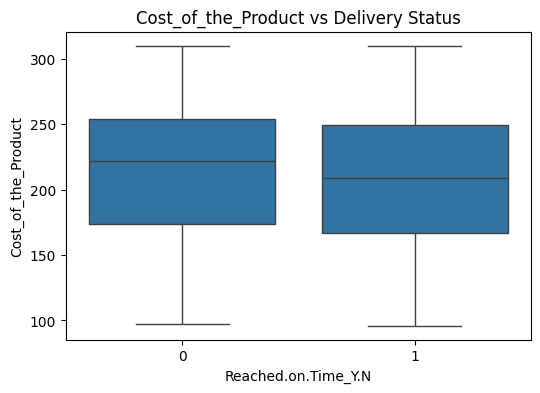

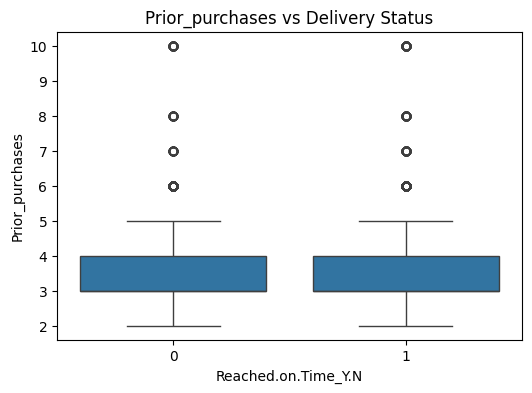

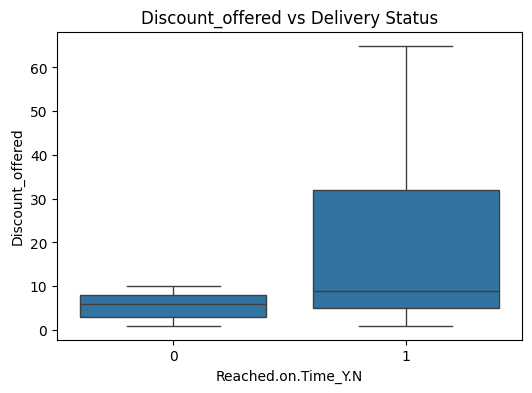

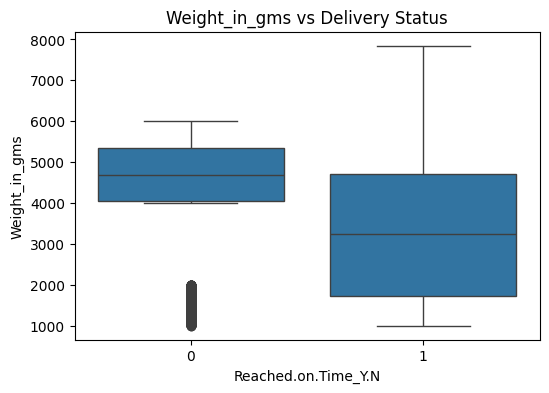

In [ ]:
for col in numerical:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Reached.on.Time_Y.N', y=col, data=df)
    plt.title(f"{col} vs Delivery Status")
    plt.show()

1. The number of customer care calls is nearly identical for both on-time and delayed deliveries, indicating no strong relationship with delivery status.
2. Customer ratings are similarly distributed for both on-time and delayed deliveries, suggesting little impact of delivery status on ratings.
3. Products delivered on time tend to have slightly higher costs on average than delayed ones, though the difference is not dramatic.
4. The number of prior purchases is nearly identical across delivery statuses, indicating no clear link between customer loyalty and on-time delivery.
5. Higher discounts are strongly associated with delayed deliveries, suggesting that heavily discounted products are more prone to late arrival.
6. Products delivered on time tend to be heavier, while lighter items are more often delayed, indicating a possible logistics issue with smaller shipments.

## **7.Categorical Features Distribution**

👉 Spot trends: e.g., “Block C has more late deliveries”, or “Flight is more reliable”

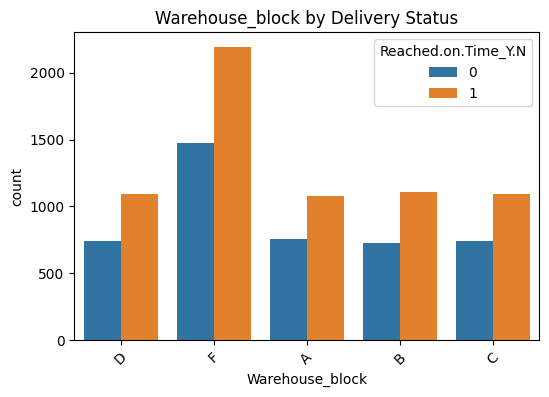

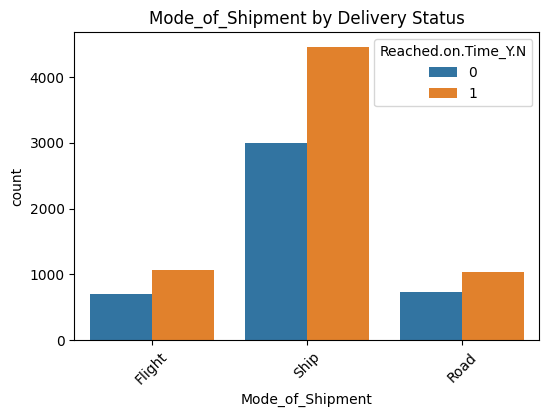

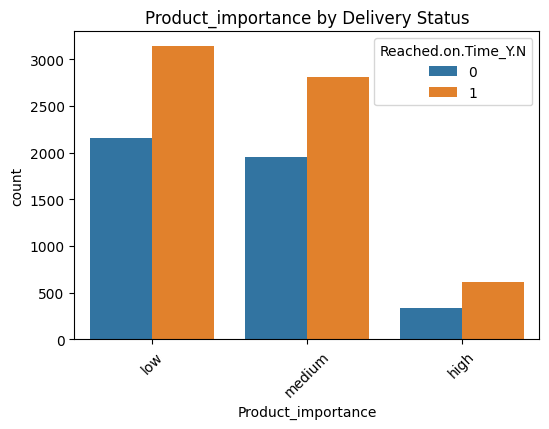

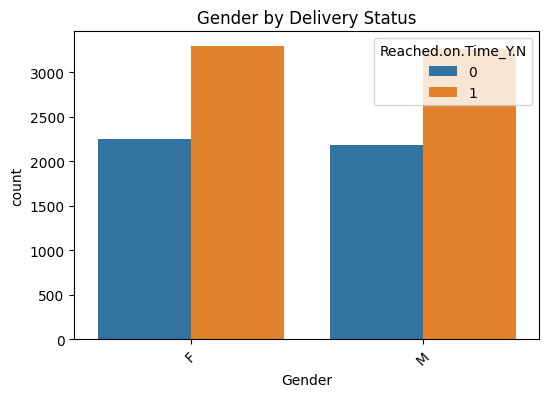

In [ ]:
categorical = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

for col in categorical:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Reached.on.Time_Y.N', data=df)
    plt.title(f"{col} by Delivery Status")
    plt.xticks(rotation=45)
    plt.show()

From categorical feature distribution-
1. Warehouse block F has the highest number of delayed deliveries, while blocks A–E show relatively balanced but still higher delays compared to on-time deliveries.
2. Shipments sent by Ship experience the most delays, while Flight and Road have fewer delivery issues by comparison.
3. Low and medium importance products are more likely to be delayed, while high importance products have fewer delays overall.
4. Both male and female customers experienced more delayed than on-time deliveries, with no significant difference between genders.


Percentage value counts for 'Warehouse_block':
Warehouse_block
F    33.330303
D    16.674243
A    16.665151
B    16.665151
C    16.665151
Name: proportion, dtype: float64


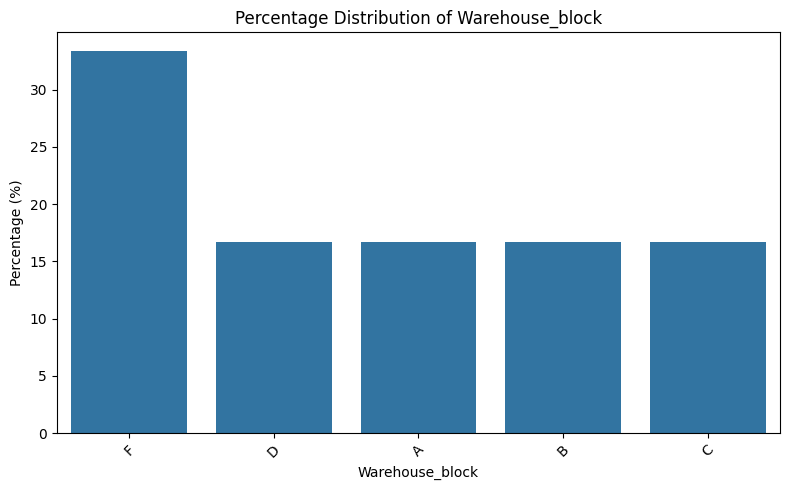


Percentage value counts for 'Mode_of_Shipment':
Mode_of_Shipment
Ship      67.842531
Flight    16.156014
Road      16.001455
Name: proportion, dtype: float64


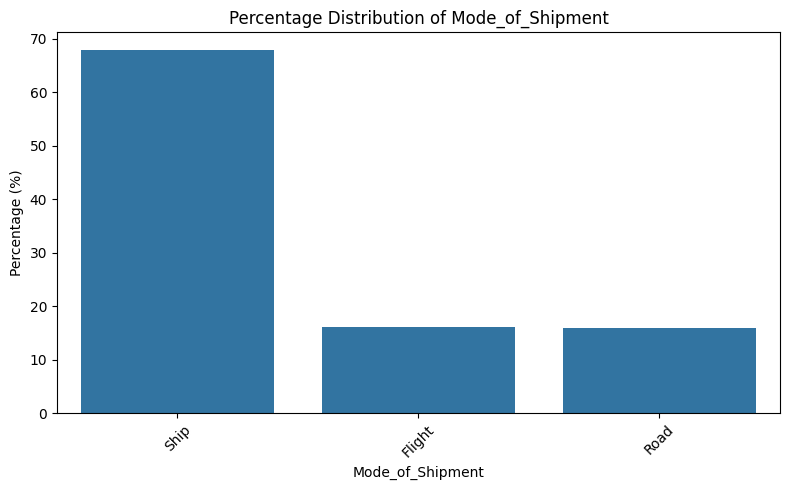


Percentage value counts for 'Product_importance':
Product_importance
low       48.158924
medium    43.222111
high       8.618965
Name: proportion, dtype: float64


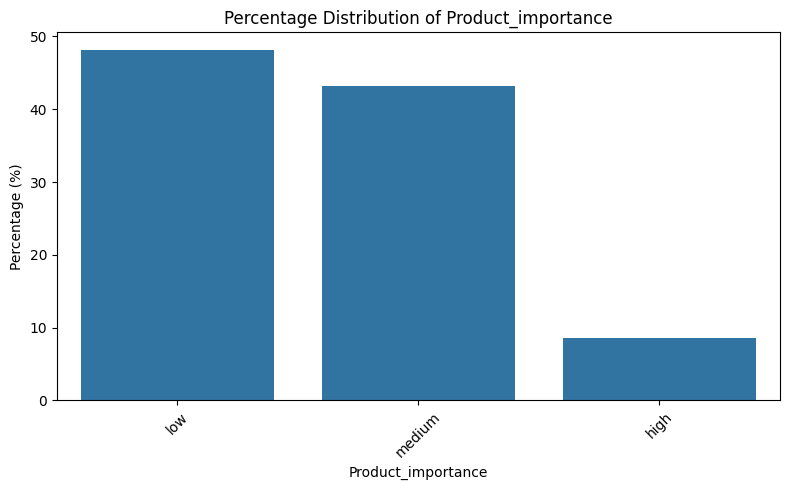


Percentage value counts for 'Gender':
Gender
F    50.413674
M    49.586326
Name: proportion, dtype: float64


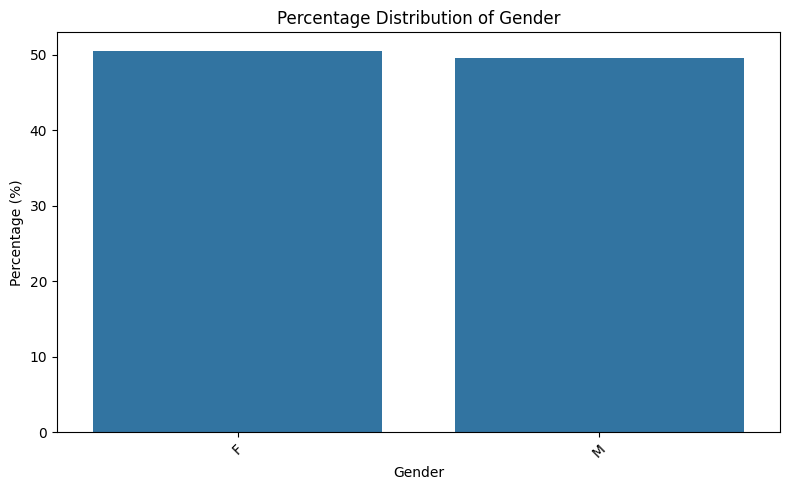

In [ ]:
# percentage of value counts of all categorical coloumn and plot the %

import matplotlib.pyplot as plt
# Select only the categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Calculate percentage of value counts for each categorical column
for col in categorical_cols:
    print(f"\nPercentage value counts for '{col}':")
    # Calculate value counts and normalize to get percentages
    value_counts_percentage = df[col].value_counts(normalize=True) * 100
    print(value_counts_percentage)

    # Plot the percentages
    plt.figure(figsize=(8, 5))
    sns.barplot(x=value_counts_percentage.index, y=value_counts_percentage.values)
    plt.title(f'Percentage Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## **8.Correlation Heatmap**

Focus: identifying key features correlated with Reached.on.Time_Y.N

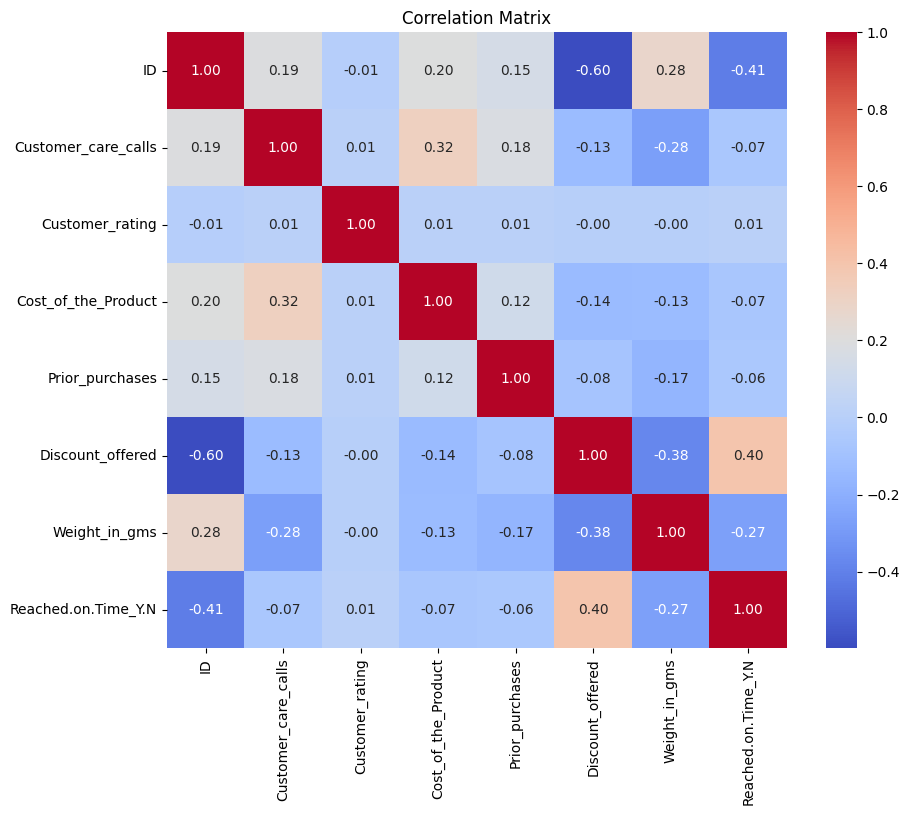

In [ ]:
import numpy as np

plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

🎯 Target Variable: Reached.on.Time_Y.N

* This is the column we want to predict (0 = on time, 1 = delayed).

🔍 Top correlated features:

* Discount_offered (+0.40) : Moderate positive: Higher discounts are associated with more delivery delays — a key predictive feature.

* Weight_in_gms (-0.27) : Moderate negative: Heavier products are more likely to arrive on time.

* ID (-0.41) : Strong negative, but this is just a unique identifier — not useful for prediction.

* Other variables (< ±0.10) : Weak or negligible correlation with delivery status.

❌ Low-impact or Neutral Features:

* Customer_care_calls, Customer_rating, Cost_of_the_Product, and Prior_purchases all have correlations between −0.07 and +0.01, indicating little to no linear relationship with delays.







## **9.Multivariate Analysis**

Multivariate relationships help uncover interactions between multiple features.

🔁 1. Product Importance × Discount × Delivery Status

<Axes: xlabel='Product_importance', ylabel='Discount_offered'>

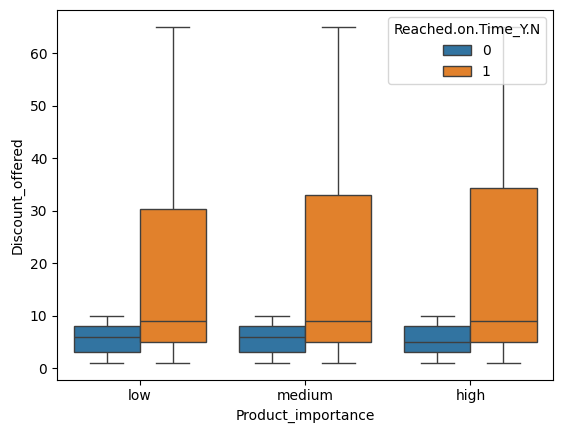

In [ ]:
sns.boxplot(x='Product_importance', y='Discount_offered', hue='Reached.on.Time_Y.N', data=df)

**Findings:** Across all product importance levels, delayed deliveries are associated with significantly higher discounts, suggesting that deep discounts may be a strong driver of delays regardless of product priority.

🏭 2. Warehouse Block × Mode of Shipment × Delivery Status

<Axes: xlabel='Warehouse_block,Mode_of_Shipment'>

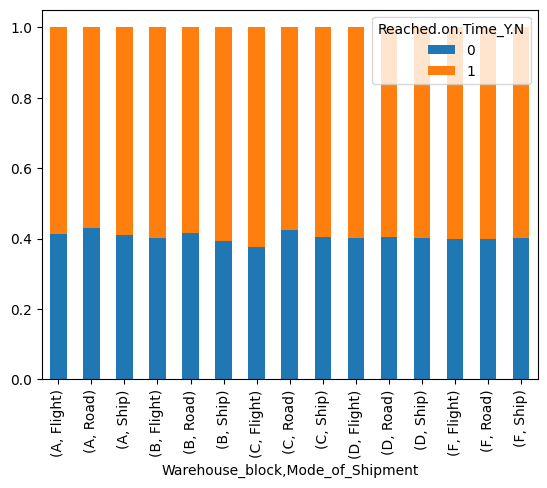

In [ ]:
pd.crosstab([df['Warehouse_block'], df['Mode_of_Shipment']], df['Reached.on.Time_Y.N'], normalize='index').plot(kind='bar', stacked=True)

**Findings:** No matter which warehouse or shipping method is used, late deliveries happen more often than on-time ones, and no specific combination clearly performs better or worse than the others.

⚖️ 3. Weight × Mode of Shipment × Delivery Status

<Axes: xlabel='Mode_of_Shipment', ylabel='Weight_in_gms'>

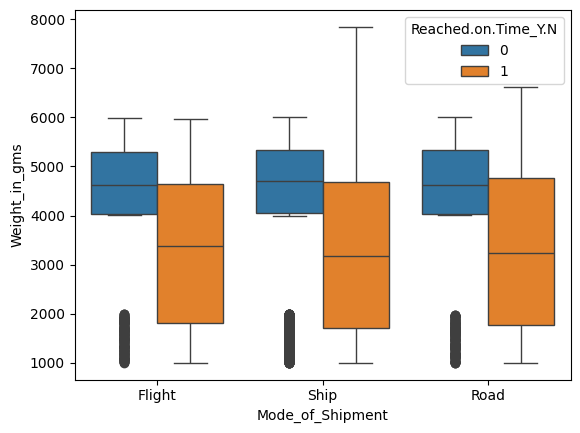

In [ ]:
sns.boxplot(x='Mode_of_Shipment', y='Weight_in_gms', hue='Reached.on.Time_Y.N', data=df)

**Findings:** For all shipment modes (Flight, Ship, Road), on-time deliveries usually involve heavier products, while lighter items are more likely to be delayed.

🧍 4. Gender × Product Importance × Delivery Status

<Axes: xlabel='Product_importance', ylabel='count'>

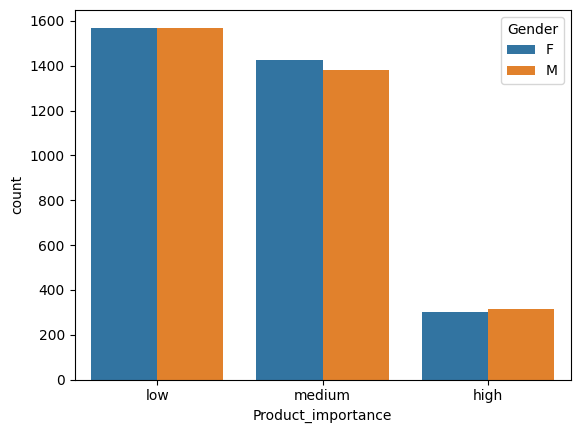

In [ ]:
sns.countplot(x='Product_importance', hue='Gender', data=df[df['Reached.on.Time_Y.N']==1])

**Findings:** Both male and female customers mostly ordered low and medium importance products, with very similar patterns across all product importance levels.

🧾 5. Discount × Cost × Delivery Status

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='relative_discount'>

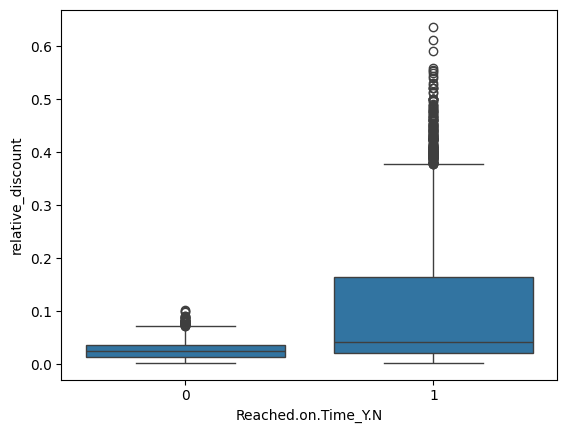

In [ ]:
df['relative_discount'] = df['Discount_offered'] / df['Cost_of_the_Product']
sns.boxplot(x='Reached.on.Time_Y.N', y='relative_discount', data=df)

**Findings:** Delayed deliveries tend to have much higher relative discounts, suggesting that products with bigger discounts (relative to their price) are more likely to arrive late.

🎯 6. Customer Rating × Customer Calls × Delivery Status

<Axes: xlabel='Customer_rating', ylabel='Customer_care_calls'>

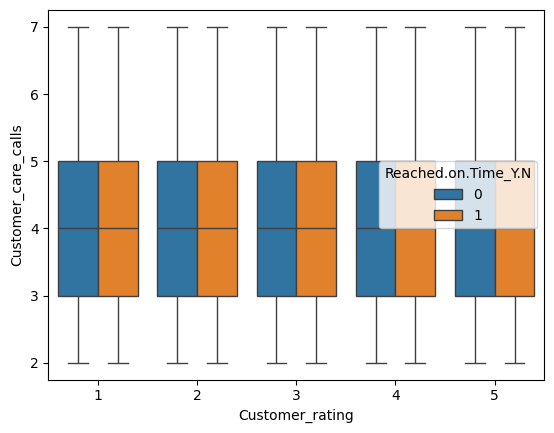

In [ ]:
sns.boxplot(x='Customer_rating', y='Customer_care_calls', hue='Reached.on.Time_Y.N', data=df)

**Findings:** The number of customer care calls remains consistent across all customer rating levels and delivery statuses, suggesting no clear link between ratings, calls, and whether a product was delivered on time.

🛒 7. Prior Purchases × Discount × Delivery Status

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='Discount_offered'>

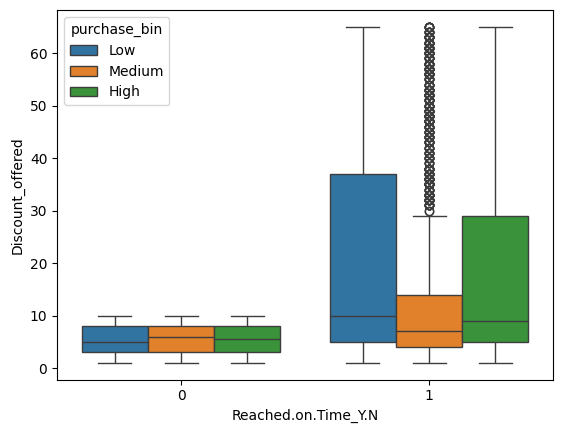

In [ ]:
df['purchase_bin'] = pd.cut(df['Prior_purchases'], bins=[1, 3, 5, 10], labels=['Low', 'Medium', 'High'])

sns.boxplot(
    x='Reached.on.Time_Y.N',
    y='Discount_offered',
    hue='purchase_bin',
    data=df
)

**Findings:** Among all customer groups, delayed deliveries are linked to higher discounts, especially for those with low and high prior purchases, suggesting that both new and loyal customers may receive more aggressive discounts that lead to fulfillment delays.

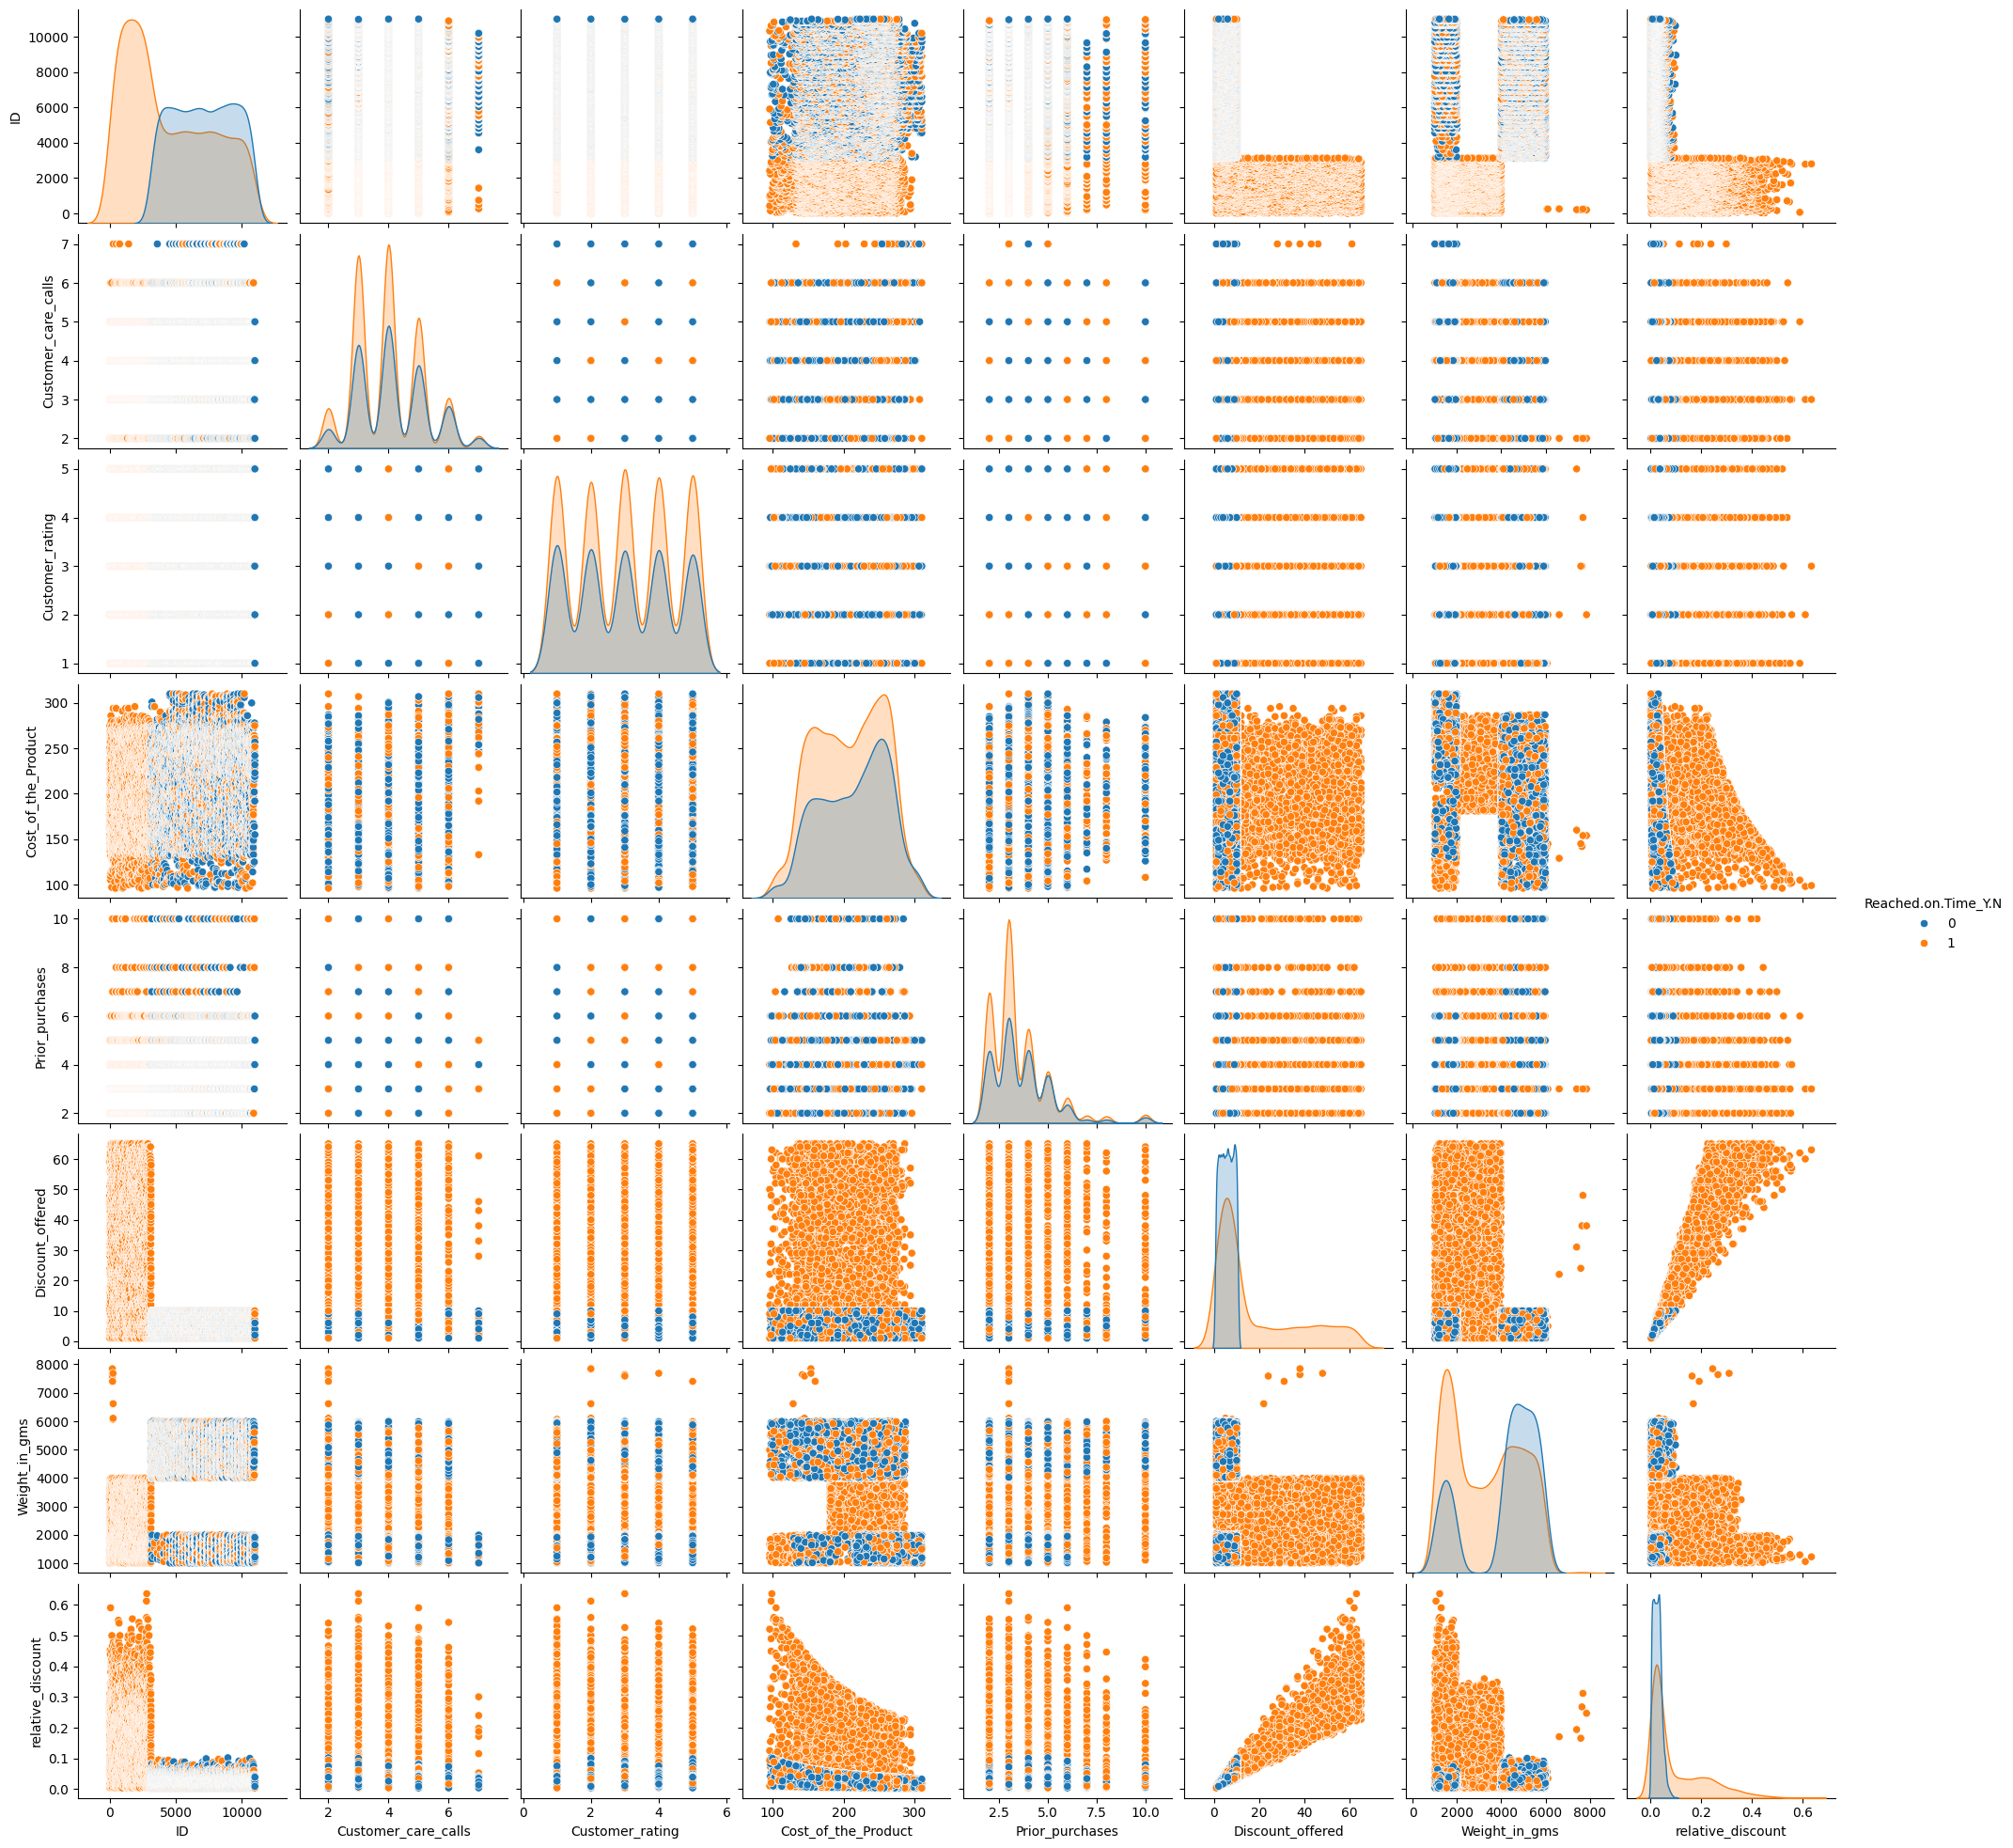

In [ ]:
#  pair plot with all numerical column

import matplotlib.pyplot as plt
sns.pairplot(df, hue='Reached.on.Time_Y.N', diag_kind='kde')
plt.show()

🔍 Most Significant Observations:

✅ 1. Discount_offered vs Reached.on.Time_Y.N

	•	One of the clearest separations in the plot.
	•	Orange points (delayed) dominate in higher discount ranges.
	•	Indicates strong correlation between high discounts and delivery delays.

✅ 2. Weight_in_gms vs Reached.on.Time_Y.N

	•	Delayed deliveries (orange) are more common among lighter products.
	•	Heavier products are more often delivered on time (blue).

✅ 3. Discount_offered vs Weight_in_gms

	•	There is a noticeable inverse pattern — lighter products tend to have higher discounts.
	•	Might explain combined impact on delivery time.

⸻

🚫 Less Useful Plots:

	•	ID doesn’t add any insight — it’s just an identifier.
	•	Customer_rating and Customer_care_calls show little variation or separation across target classes.


In [ ]:
df.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,relative_discount,purchase_bin
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,0.248588,Low
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,0.273148,Low
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,0.262295,Medium
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,0.056818,Medium
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,0.250000,Low


## **10.Correlation Heatmap with numerical and encoded categorical column**

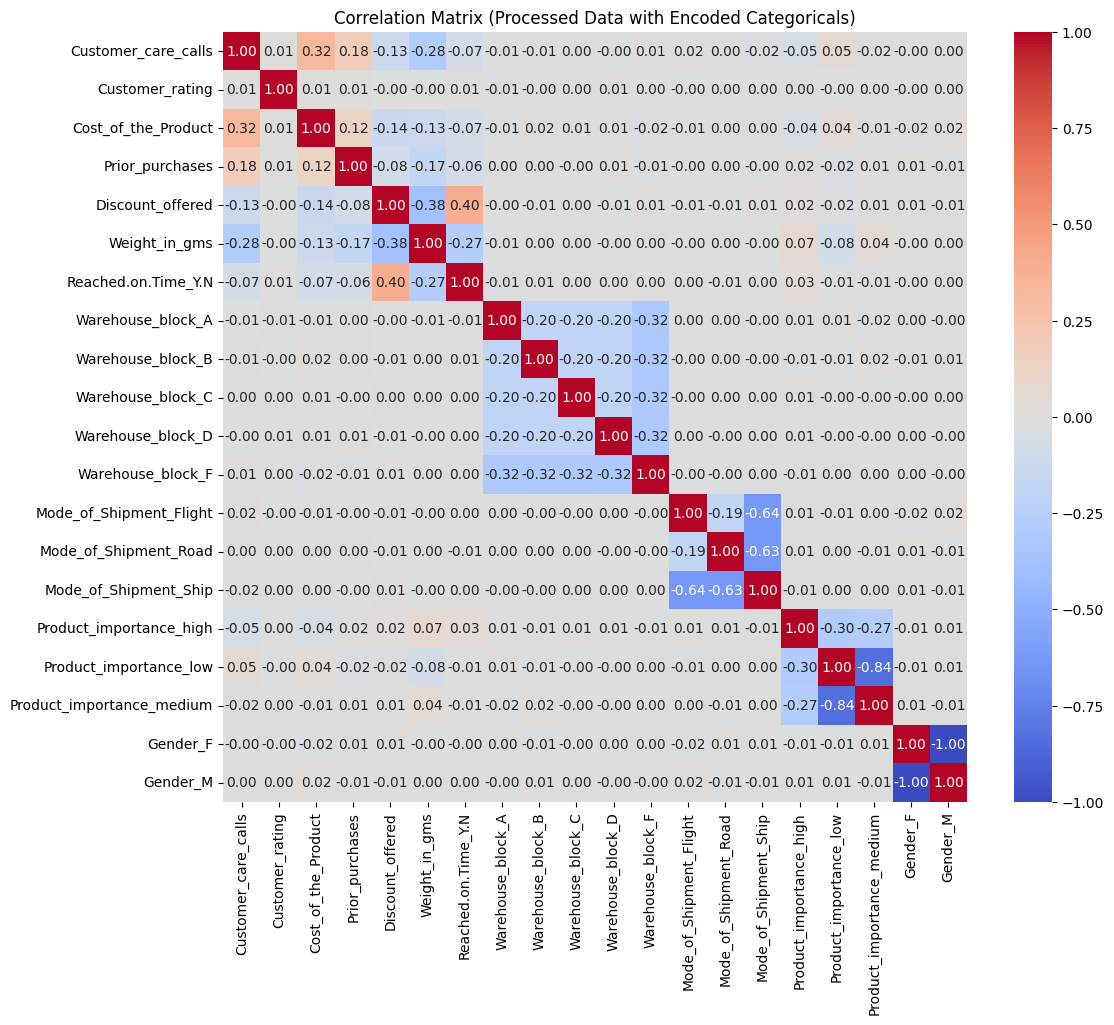

In [ ]:
# Correlation heatmap of all variables

import pandas as pd
import matplotlib.pyplot as plt
# Drop unnecessary columns for the new DataFrame
df_processed = df.drop(columns=['ID', 'relative_discount','purchase_bin' ])

# One-hot encode categorical columns
categorical_cols_to_encode = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
df_processed = pd.get_dummies(df_processed, columns=categorical_cols_to_encode, drop_first=False)

# Calculate and plot the correlation heatmap
plt.figure(figsize=(12, 10))
corr_processed = df_processed.corr()
sns.heatmap(corr_processed, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Processed Data with Encoded Categoricals)")
plt.show()


**📊 Correlation Heatmap Summary (Encoded Data)**

**✅ Target Variable: Reached.on.Time_Y.N**

This column shows whether the product was delayed (1) or on time (0).

**🔍 Top Factors Correlated with Delay**

**1. Discount_offered (+0.40) :** Higher discounts are linked to more delivery delays.

**2. Weight_in_gms (-0.27) :** Heavier products are more likely to be delivered on time.

**3. Cost_of_the_Product (-0.07) :** Slight trend- higher-cost items may arrive more reliably.

**4. Customer variables (~0) :** Calls, ratings, prior purchases → no real correlation.

**🚚 Warehouse Insights**

•	Individual warehouse blocks show very weak correlations (±0.01).

•	Meaning: No specific warehouse alone explains delivery delays.

**✈️ Mode of Shipment**

•	Flight, Ship, Road: no direct strong correlation with delay in this view.

•	These were more informative in multivariate plots (e.g. Ship + Light = Delay).

**📦 Product Importance**

•	Product importance levels show very weak or no correlation with delay- High/Medium/Low importance don’t strongly influence delivery time.

**✅ Conclusion**

•	High discounts and low product weight are the strongest predictors of delay.

•	Other variables like customer behavior, shipment mode, or product category have minimal individual influence.

•	Multivariate interactions (e.g., discount + weight + mode) matter more — confirmed in earlier pairplots and boxplots.






# **Data Preprocessing for Modeling**

In [ ]:
df.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,relative_discount,purchase_bin
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,0.248588,Low
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,0.273148,Low
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,0.262295,Medium
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,0.056818,Medium
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,0.250000,Low


##**1. Drop Unnecessary Column**

In [ ]:
#  droping id,relative_discount and purchase_bin columns from df

df = df.drop(columns=['ID', 'relative_discount','purchase_bin' ])

In [ ]:
df.head(2)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1


## **2. Capping the Outliers**

--- Prior_purchases Outlier Capping ---
Q1: 3.0, Q3: 4.0, IQR: 1.0
Lower Bound: 1.5, Upper Bound: 5.5
Number of outliers below lower bound: 0
Number of outliers above upper bound: 1003
Number of outliers after capping: 0

--- Discount_offered Outlier Capping ---
Q1: 4.0, Q3: 10.0, IQR: 6.0
Lower Bound: -5.0, Upper Bound: 19.0
Number of outliers below lower bound: 0
Number of outliers above upper bound: 2209
Number of outliers after capping: 0



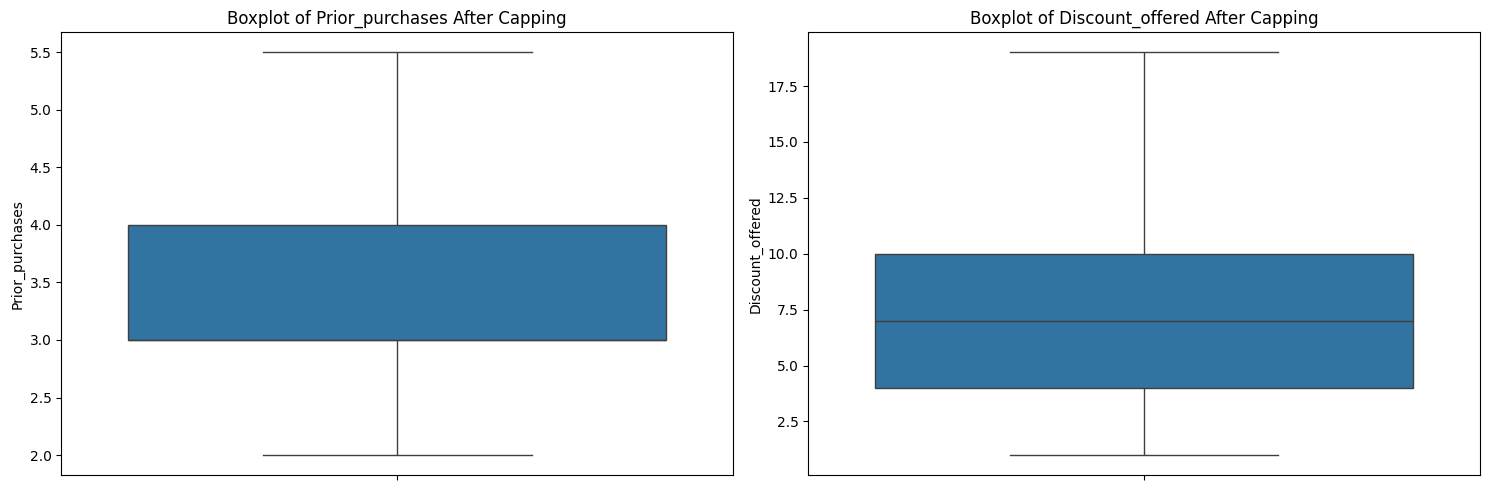

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3.0,low,F,19.0,1233,1
1,F,Flight,4,5,216,2.0,low,M,19.0,3088,1


In [ ]:
# prompt: check the outliers

import matplotlib.pyplot as plt
import numpy as np
# Function to detect outliers using IQR and cap them
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"--- {column} Outlier Capping ---")
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    outliers_lower = df[df[column] < lower_bound][column]
    outliers_upper = df[df[column] > upper_bound][column]

    print(f"Number of outliers below lower bound: {len(outliers_lower)}")
    print(f"Number of outliers above upper bound: {len(outliers_upper)}")

    # Cap the outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    print(f"Number of outliers after capping: {len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])}\n")
    return df

# Identify numerical columns where capping might be relevant based on boxplots
# From the boxplots, 'Prior_purchases' and 'Discount_offered' showed significant outliers.
# 'Customer_care_calls' and 'Customer_rating' did not show outliers by IQR definition
# 'Cost_of_the_Product' and 'Weight_in_gms' also didn't show typical outliers that require capping in this dataset according to the IQR method.
# We will cap 'Prior_purchases' and 'Discount_offered'.

columns_to_cap = ['Prior_purchases', 'Discount_offered']

for col in columns_to_cap:
    df = cap_outliers_iqr(df, col)

# Re-check boxplots after capping to see the effect
plt.figure(figsize=(15, 5))
for i, col in enumerate(columns_to_cap):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col} After Capping')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

df.head(2)


## **3. Handling Skewness of Numerical Columns**

In [ ]:
# checking skewness of the column

numerical = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
             'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

# Calculate skewness for each numerical column
for col in numerical:
    skewness = df[col].skew()
    print(f"Skewness of '{col}': {skewness:.2f}")

Skewness of 'Customer_care_calls': 0.39
Skewness of 'Customer_rating': 0.00
Skewness of 'Cost_of_the_Product': -0.16
Skewness of 'Prior_purchases': 0.42
Skewness of 'Discount_offered': 0.71
Skewness of 'Weight_in_gms': -0.25


📊 Skewness Interpretation Guide

	•	0.00 → perfectly symmetric (normal)
	•	±0.1–0.5 → low skew (generally acceptable)
	•	±0.5–1.0 → moderate skew
	•	> ±1.0 → high skew (consider handling)

-->Customer_care_calls:
+0.39
Slightly right-skewed,
❌ No skewness handling, this is acceptable

-->Customer_rating:
0.00
Perfectly symmetric,
✅ No action needed

-->Cost_of_the_Product:
−0.16
Slight left skew,
❌ No skewness handling, it’s nearly symmetric

-->Prior_purchases:
+0.42
Mild right skew, greatly improved after capping outlier (was 1.68), no need to handle skewness


-->Discount_offered:
+0.71
Moderate right skew after capping outliers (was 1.80)
,
✅ Yes skewness handling, consider transformation

-->Weight_in_gms:
−0.25
Slight left skew,
❌ No skewness handling, it’s fine



Skewness of 'Discount_offered' after log transformation: -0.24282446003828265


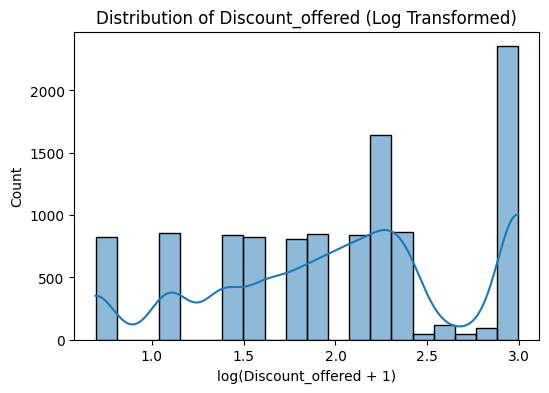

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3.0,low,F,2.995732,1233,1
1,F,Flight,4,5,216,2.0,low,M,2.995732,3088,1


In [ ]:
#  log transform to Discount_offered column

import matplotlib.pyplot as plt
import numpy as np
# Apply log transformation to 'Discount_offered'
# We add 1 to handle potential zero values in 'Discount_offered' before taking the log.
df['Discount_offered'] = np.log1p(df['Discount_offered'])

# Check skewness again after transformation
print("\nSkewness of 'Discount_offered' after log transformation:", df['Discount_offered'].skew())

# Visualize the distribution after transformation
plt.figure(figsize=(6, 4))
sns.histplot(df['Discount_offered'], kde=True, bins=20)
plt.title('Distribution of Discount_offered (Log Transformed)')
plt.xlabel('log(Discount_offered + 1)')
plt.show()

df.head(2)


## **4. Encoding categorical variables**

In [ ]:
# prompt: apply label encoder to categorical column

from sklearn.preprocessing import LabelEncoder

# Select the categorical columns to encode
categorical_cols_to_encode = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

# Apply Label Encoding to each selected categorical column
for col in categorical_cols_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    print(f"Encoded '{col}' column with LabelEncoder")

df.head(5)


Encoded 'Warehouse_block' column with LabelEncoder
Encoded 'Mode_of_Shipment' column with LabelEncoder
Encoded 'Product_importance' column with LabelEncoder
Encoded 'Gender' column with LabelEncoder


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3.0,1,0,2.995732,1233,1
1,4,0,4,5,216,2.0,1,1,2.995732,3088,1
2,0,0,2,2,183,4.0,1,1,2.995732,3374,1
3,1,0,3,3,176,4.0,2,1,2.397895,1177,1
4,2,0,2,2,184,3.0,2,0,2.995732,2484,1


## **5. Train-test Split**

In [ ]:
# Define target and features
from sklearn.model_selection import train_test_split
X = df.drop('Reached.on.Time_Y.N', axis=1)
y = df['Reached.on.Time_Y.N']

# Train-test split using stratify which ensures balanced class distribution in train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## **6. Scale numeric features**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      10999 non-null  int64  
 1   Mode_of_Shipment     10999 non-null  int64  
 2   Customer_care_calls  10999 non-null  int64  
 3   Customer_rating      10999 non-null  int64  
 4   Cost_of_the_Product  10999 non-null  int64  
 5   Prior_purchases      10999 non-null  float64
 6   Product_importance   10999 non-null  int64  
 7   Gender               10999 non-null  int64  
 8   Discount_offered     10999 non-null  float64
 9   Weight_in_gms        10999 non-null  int64  
 10  Reached.on.Time_Y.N  10999 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 945.4 KB


In [ ]:
# Scaling the numeric features after train test split will prevent the data leakage
from sklearn.preprocessing import StandardScaler
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [ ]:
X_train.head(5)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
7920,0.452459,-0.685120,-0.043121,-1.415468,1.056631,-1.258246,1.031948,-0.982984,0.375470,0.322365
1529,1.123597,0.636601,-0.921405,0.001852,-1.003783,-1.258246,-0.547202,-0.982984,1.377243,-1.206929
10521,-0.889816,0.636601,-0.921405,-0.706808,0.224140,-1.258246,1.031948,1.017311,0.375470,0.510849
9558,0.452459,0.636601,-0.921405,1.419173,-1.107845,0.499592,1.031948,-0.982984,-1.364576,0.617330
968,-1.560954,-2.006841,-1.799688,1.419173,1.285566,-1.258246,-0.547202,1.017311,1.377243,0.004144


# **Baseline Modeling** (Logistic Reg. ,SVM, Decision Tree, Random Forest, KNN, XGBoost)






In [ ]:
# logistic regression, SVM,decision tree, random forest, KNN and xgb boost model with evaluation accuaracy, precision,recall,f1, classification report, roc-auc

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score

# Dictionary to store results
results = {}

# List of models to train
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVM": SVC(random_state=42, probability=True), # probability=True for ROC-AUC
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Calculate ROC-AUC for models that support probability prediction
    roc_auc = None
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "Classification Report": report,
        "ROC-AUC": roc_auc
    }

    # Print evaluation results
    print(f"\n--- {name} Evaluation ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\nClassification Report:")
    print(report)
    if roc_auc is not None:
        print(f"ROC-AUC: {roc_auc:.4f}")
    print("-" * 30)

# Optional: Create a summary table of metrics (excluding the full report)
summary_metrics = {}
for name, metrics in results.items():
    summary_metrics[name] = {
        "Accuracy": metrics["Accuracy"],
        "Precision": metrics["Precision"],
        "Recall": metrics["Recall"],
        "F1-score": metrics["F1-score"],
        "ROC-AUC": metrics["ROC-AUC"] if metrics["ROC-AUC"] is not None else "N/A"
    }

summary_df = pd.DataFrame(summary_metrics).T
print("\n--- Model Performance Summary ---")
summary_df

Training Logistic Regression...

--- Logistic Regression Evaluation ---
Accuracy: 0.6268
Precision: 0.6697
Recall: 0.7395
F1-score: 0.7029

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.46      0.50       887
           1       0.67      0.74      0.70      1313

    accuracy                           0.63      2200
   macro avg       0.61      0.60      0.60      2200
weighted avg       0.62      0.63      0.62      2200

ROC-AUC: 0.7164
------------------------------
Training SVM...

--- SVM Evaluation ---
Accuracy: 0.6686
Precision: 0.8387
Recall: 0.5506
F1-score: 0.6648

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.84      0.67       887
           1       0.84      0.55      0.66      1313

    accuracy                           0.67      2200
   macro avg       0.70      0.70      0.67      2200
weighted avg       0.73      0.67      0.67      2200

ROC-A

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [22:16:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Accuracy,Precision,Recall,F1-score,ROC-AUC
Logistic Regression,0.626818,0.669655,0.739528,0.702859,0.716412
SVM,0.668636,0.838747,0.550647,0.664828,0.732376
Decision Tree,0.643182,0.697605,0.709825,0.703662,0.627178
Random Forest,0.660455,0.766478,0.619954,0.685474,0.733336
KNN,0.637727,0.711475,0.661081,0.685353,0.713133
XGBoost,0.655000,0.743409,0.644326,0.690330,0.729494


# **Evaluation from Baseline Models**

**✅ Key Evaluation Metrics (business case) from base line models**

This machine learning models are built to predict on-time vs delayed deliveries for an e-commerce company. The objective is to:

	•	Reduce late deliveries,
	•	Optimize logistics,
	•	And support better decision-making.

**F1-Score**:
Balances precision and recall. Best overall metric when both false positives and false negatives matter.

**Recall**:
Prioritize this if you want to catch as many late deliveries as possible.

**ROC-AUC**:
Good for comparing overall model performance across thresholds.

**Precision**:
Less critical here — false alarms (on-time wrongly flagged as late) are tolerable.

**Accuracy**:
Not the best metric if the dataset is imbalanced or recall is more important.

**🏆 Best Model (So Far)**

	•	F1-Score Winner: Decision Tree (0.704) & Logistic Regression Model (0.703) — balanced performance
	•	Highest Recall: Logistic Regression (0.740) — great at identifying late deliveries
	•	Top ROC-AUC: Random Forest (0.733) — great overall ranking of predictions



# **Hyperparameter Tuning all the Models**

In [ ]:
#  hyperparameter tuning with gridsearch for logistic regression, SVM,decision tree, random forest, KNN and xgb boost model with evaluation accuaracy, precision,recall,f1, classification report, roc-auc

import pandas as pd
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'], # L1 penalty is not supported with solver 'liblinear' default
    'solver': ['liblinear', 'lbfgs']
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf']
}

param_grid_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.7, 1.0],
    'subsample': [0.7, 1.0]
}


# Dictionary of models and their parameter grids
models_with_params = {
    "Logistic Regression": (LogisticRegression(random_state=42), param_grid_lr),
    "SVM": (SVC(random_state=42, probability=True), param_grid_svm), # probability=True for ROC-AUC
    "Decision Tree": (DecisionTreeClassifier(random_state=42), param_grid_dt),
    "Random Forest": (RandomForestClassifier(random_state=42), param_grid_rf),
    "KNN": (KNeighborsClassifier(), param_grid_knn),
    "XGBoost": (XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), param_grid_xgb)
}

# Dictionary to store results after tuning
tuned_results = {}
best_models = {}

# Perform GridSearchCV for each model
for name, (model, param_grid) in models_with_params.items():
    print(f"Performing GridSearchCV for {name}...")

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                               scoring='roc_auc', cv=3, n_jobs=-1, verbose=1) # Using ROC-AUC as scoring metric

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    best_models[name] = best_model

    print(f"Best parameters for {name}: {best_params}")

    # Evaluate the best model on the test set
    y_pred = best_model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Calculate ROC-AUC (only for models that support predict_proba)
    roc_auc = None
    if hasattr(best_model, "predict_proba"):
        y_pred_proba = best_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Store results
    tuned_results[name] = {
        "Best Parameters": best_params,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "Classification Report": report,
        "ROC-AUC": roc_auc
    }

    # Print evaluation results
    print(f"\n--- Tuned {name} Evaluation ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\nClassification Report:")
    print(report)
    if roc_auc is not None:
        print(f"ROC-AUC: {roc_auc:.4f}")
    print("-" * 30)


# Optional: Create a summary table of metrics (excluding the full report) for tuned models
tuned_summary_metrics = {}
for name, metrics in tuned_results.items():
    tuned_summary_metrics[name] = {
        "Accuracy": metrics["Accuracy"],
        "Precision": metrics["Precision"],
        "Recall": metrics["Recall"],
        "F1-score": metrics["F1-score"],
        "ROC-AUC": metrics["ROC-AUC"] if metrics["ROC-AUC"] is not None else "N/A"
    }

tuned_summary_df = pd.DataFrame(tuned_summary_metrics).T
print("\n--- Tuned Model Performance Summary ---")
tuned_summary_df


Performing GridSearchCV for Logistic Regression...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

--- Tuned Logistic Regression Evaluation ---
Accuracy: 0.6295
Precision: 0.6727
Recall: 0.7388
F1-score: 0.7042

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.47      0.50       887
           1       0.67      0.74      0.70      1313

    accuracy                           0.63      2200
   macro avg       0.61      0.60      0.60      2200
weighted avg       0.62      0.63      0.62      2200

ROC-AUC: 0.7162
------------------------------
Performing GridSearchCV for SVM...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for SVM: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}

--- Tuned SVM Evaluation ---
Accuracy: 0.6559
Precision: 0.8271
Recall: 0.5354
F1-score: 0.6500

Classification Report

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [22:31:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Accuracy,Precision,Recall,F1-score,ROC-AUC
Logistic Regression,0.629545,0.672677,0.738766,0.704174,0.716172
SVM,0.655909,0.827059,0.535415,0.650023,0.731588
Decision Tree,0.679545,0.969136,0.478294,0.640490,0.739329
Random Forest,0.660455,0.776908,0.604722,0.680086,0.736349
KNN,0.634545,0.710505,0.654227,0.681205,0.718486
XGBoost,0.660000,0.716144,0.712871,0.714504,0.752000


# **Evaluation after hyperparameter tuning**

**✅ Goal Recap: What I Want to Achieve**

	•	Predict on-time vs delayed deliveries
	•	Minimize false negatives (missed late deliveries → high recall)
	•	Have a model that’s balanced across precision, recall, F1-score, and ROC-AUC
	•	Gain business insights from a model with good interpretability

**🏆 Best Overall Model: XGBoost**


  •	Highest F1-score: 0.715 → Best balance between precision & recall

  •	Highest ROC-AUC: 0.752 → Best overall separation between delayed vs. on-time

  •	High Recall: 0.713 → Very important to catch most delayed deliveries



**🏆 Second Best Overall Model: Logistic Regression**

  •	2nd Highest F1-score: 0.704 → good balance between precision & recall

  •	2nd Highest ROC-AUC: 0.716 → good overall separation between delayed vs. on-time

  •	Highest Recall: 0.739 → Very important to catch most delayed deliveries

These models perform best according to the project KPIs.

# **Conclusion**


My recommendation is to use **XGBoost** as  primary model — it offers the best trade-off between recall, F1-score, and overall model quality (ROC-AUC).
Complement it with **Logistic Regression** for interpretability if needed in a business context.